In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
raw_data = pd.read_csv('companies_dataset_nounits.csv')
print(raw_data.head())

  company       company_type    year  quarter  quarterly_revenue_mil  \
0    Visa  payment_processor  2010.0      3.0                 1710.0   
1    Visa  payment_processor  2010.0      4.0                 1740.0   
2    Visa  payment_processor  2010.0      1.0                 1650.0   
3    Visa  payment_processor  2010.0      2.0                 1650.0   
4    Visa  payment_processor  2010.0      3.0                 1880.0   

   quarterly_revenue  gross_profit_mil  gross_profit  gross_margin  users_mil  \
0       1.710000e+09            1300.0  1.300000e+09         0.760     1670.0   
1       1.740000e+09            1350.0  1.350000e+09         0.775     1720.0   
2       1.650000e+09            1260.0  1.260000e+09         0.767     1720.0   
3       1.650000e+09            1270.0  1.270000e+09         0.770     1730.0   
4       1.880000e+09            1410.0  1.410000e+09         0.752     1770.0   

          users user_type  revenue_per_user        term_1  \
0  1.670000e+09    

the broad plan is to:
1. perform nonlinear regression on each company in this dataset
       * fitting to the Universal Scalability Law
       * USL information found here: https://cdn2.hubspot.net/hubfs/498921/eBooks/scalability_new.pdf
       * nonlinear least-squares regression plan on pg. 18
2. write a classification algorithm to see if w

In [5]:
# let's first separate the companies from each other
companies = raw_data['company'].unique()
company_data = {}
for company in companies:
    company_data[company] = raw_data[raw_data['company'] == company]

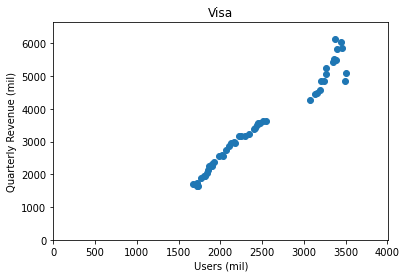

In [6]:
# the USL is a general "law" that can apply to any system - here the company is the system
# the "throughput" of the company is the revenue
# the "nodes" of the company are the users/customers (this isn't immediately obvious)

# so let's graph nodes vs. throughput
plt.scatter(
    x=company_data['Visa']['users_mil'], 
    y=company_data['Visa']['quarterly_revenue_mil'],
)
plt.xlim(0, company_data['Visa']['users_mil'].max() + 500)
plt.ylim(0, company_data['Visa']['quarterly_revenue_mil'].max() + 500)
plt.title('Visa')
plt.xlabel('Users (mil)')
plt.ylabel('Quarterly Revenue (mil)')
plt.show()

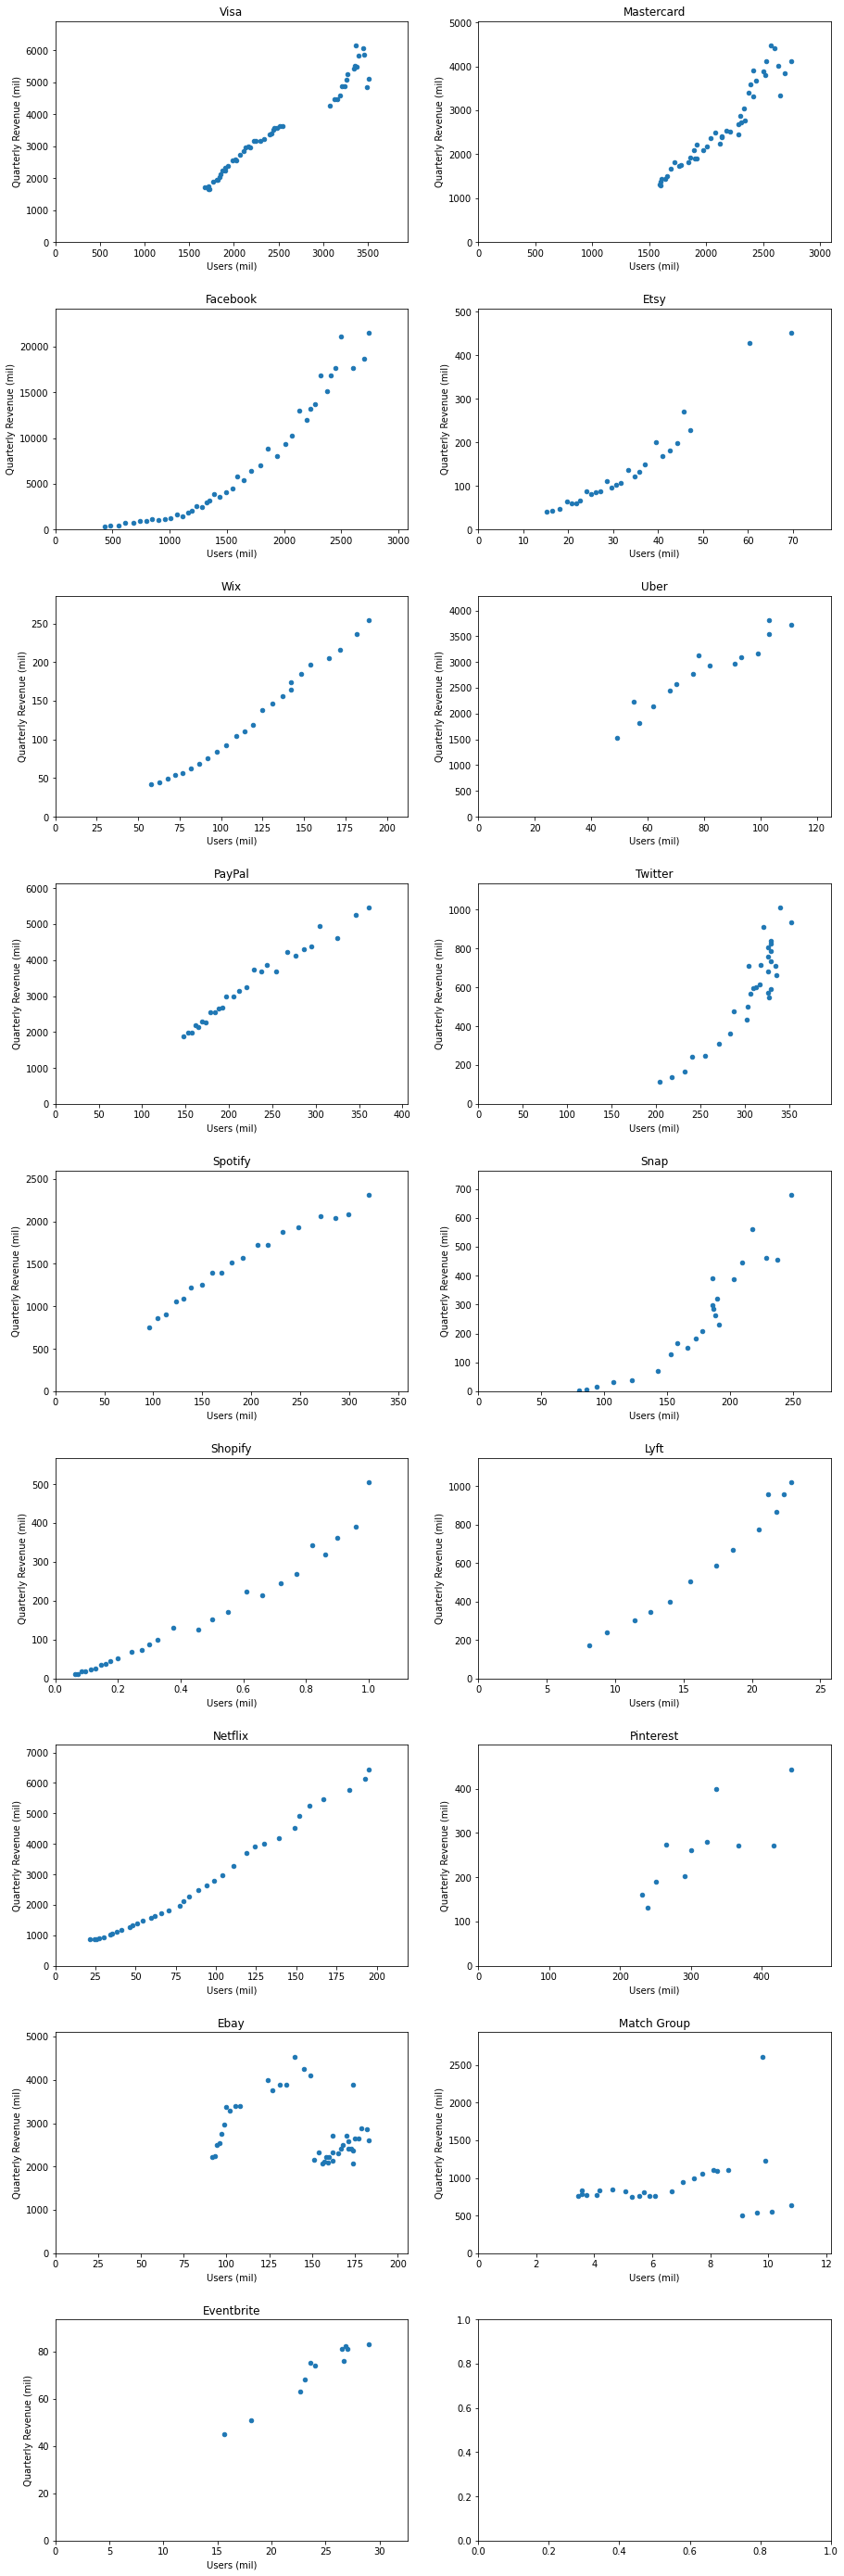

In [7]:
# all companies user vs. revenue graphs

fig, axs = plt.subplots(9, 2, figsize=(15,50))
for i, c in enumerate(companies):
    # cplt = user_rev_fig.add_subplot(1, 1, 1)
    spxi = int(np.floor(i/2))
    spyi = i % 2
    company_data[c].plot(
        kind='scatter',
        x='users_mil',
        y='quarterly_revenue_mil',
        ax=axs[spxi, spyi],
        xlabel='Users (mil)',
        ylabel='Quarterly Revenue (mil)',
        title=c,
    )
    xmax = company_data[c]['users_mil'].max()
    ymax = company_data[c]['quarterly_revenue_mil'].max()
    axs[spxi, spyi].set_xlim(0, xmax + xmax/8)
    axs[spxi, spyi].set_ylim(0, ymax + ymax/8)
plt.subplots_adjust(hspace=0.3)
plt.show()

Nonlinear least-squares regression: https://en.wikipedia.org/wiki/Non-linear_least_squares

Leads me to the Gauss-Newton algorithm: https://en.wikipedia.org/wiki/Gauss%E2%80%93Newton_algorithm

So that's what we'll attempt to implement

To carry out the steps:

1. We start with an initial guess for the parameters, lambda, sigma, and kappa

2. We need the jacobian matrix, which requires the gradient of the USL

3. We need to calculate the residuals of our data

4. Then carry out the nls regression, updating the parameters beta at each step - we stop when we've reached a convergence criterion
